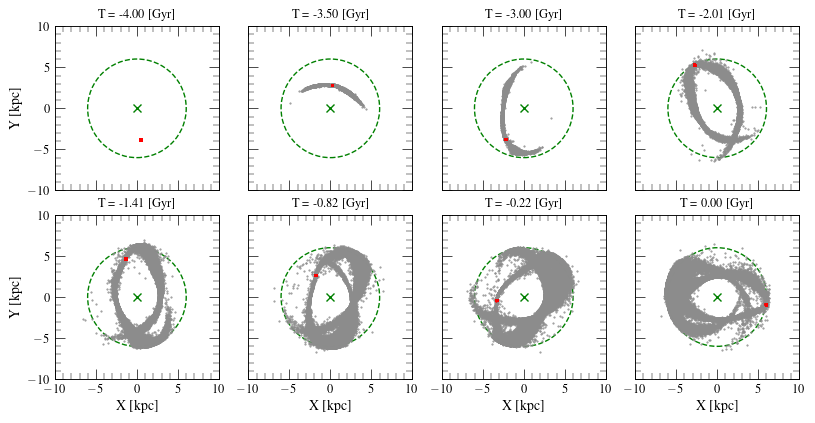

In [65]:
from astropy.visualization import quantity_support, astropy_mpl_style
quantity_support()  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib_inline
mpl.style.use('default')
mpl.style.use('tableau-colorblind10')
mpl.style.use('../MNRAS_Style.mplstyle')
mpl.rcParams['figure.figsize'] = [12/3, 12/3]

# in points - start with the body text size and play around
SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

import os
from os import listdir
import numpy as np

def time(f):
    return float(f.replace('OUT3_', '').replace('.frame', ''))

frames = [file for file in listdir('./') if file.endswith('.frame')]
order = list(sorted(frames, key=time))
t = [time(f) for f in order]

e = [0, 5, 10, 20, 26, 32, 38, 41]
'''
e = []
last = 0
for i, x in enumerate(t):
    if x > last+200:
        e.append(i)
        last = x

if e[-1] != len(t)-1:
    e.append(len(t)-1)

'''
sel_frames = [(order[i], -4000 if i == 0 else t[i]-t[-1]) for i in e]

fig, axes = plt.subplots(2, 4, figsize=(24/3, 12/3), sharex=True, sharey=True)
fig.tight_layout()


plt.setp(axes[-1, :], xlabel='X [kpc]')
plt.setp(axes[:, 0], ylabel='Y [kpc]')

for ax, (file, t) in zip(axes.flat, sel_frames):
    circle = plt.Circle((0, 0), 6.01, color='g', fill=False, ls='--')

    ax.set_title(f'T = {t/1000:7.2f} [Gyr]')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    dat = np.loadtxt(file)
    bound = dat[:,3] != 0
    xb = dat[:,0][bound]/1000
    yb = dat[:,1][bound]/1000
    xu = dat[:,0][~bound]/1000
    yu = dat[:,1][~bound]/1000

    ax.plot(xu, yu, '.', color='#8c8c8c', ms=1)
    ax.plot(xb, yb, '.r', ms=1)
    ax.add_patch(circle)
    ax.plot([0], [0], 'gx')
